# Heatmaps for 2018 MLB Batting Data

## Import neccesary modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches, gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Rectangle, Arc

## Import Data

In [3]:
MLBAM18 = pd.read_csv("MLBAM18.csv")
MLBAM18.drop(['Unnamed: 0'], axis=1, inplace=True)
pd.set_option('display.max_columns', 100)
MLBAM18.head()

,inning,batterId,pitcherId,event,x,y,ab_num,timestamp,stand,throws,runnerMovement,half,balls,strikes,endOuts,actionId,description,game_type,home_team,home_teamId,home_lg,away_team,away_teamId,away_lg,venueId,stadium,field_teamId,playerId.1B,playerId.2B,playerId.3B,playerId.C,playerId.CF,playerId.LF,playerId.RF,playerId.SS,batterPos,batterName,pitcherName,runsOnPlay,startOuts,runsInInning,runsITD,runsFuture,start1B,start2B,start3B,end1B,end2B,end3B,outsInInning,startCode,endCode,fielderId,gameId,isPA,isAB,isHit,isBIP,our.x,our.y,r,theta
0,1,664023,570632,Home Run,233.22,70.48,1,2018-03-29 16:43:11,L,R,[664023:::T:Home Run],top,0,0,0,NaN,Ian Happ homers (1) on a fly ball to right fie...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,CF,"Happ, I",Urena,1,0,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,True,False,270.081515,320.743636,419.309557,0.870937
1,1,592178,570632,Walk,NaN,NaN,2,2018-03-29 16:43:56,R,R,[592178::1B::Walk],top,4,2,0,NaN,Kris Bryant walks.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,3B,Bryant,Urena,0,0,3,1,2,NaN,NaN,NaN,592178.0,NaN,NaN,3,0,1,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
2,1,519203,570632,Hit By Pitch,NaN,NaN,3,2018-03-29 16:46:24,L,R,[592178:1B:2B::Hit By Pitch][519203::1B::Hit B...,top,1,2,0,NaN,Anthony Rizzo hit by pitch. Kris Bryant to ...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,1B,Rizzo,Urena,0,0,3,1,2,592178.0,NaN,NaN,519203.0,592178.0,NaN,3,1,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
3,1,575929,570632,Strikeout,NaN,NaN,4,2018-03-29 16:48:44,R,R,NaN,top,2,3,1,NaN,Willson Contreras strikes out swinging.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,C,Contreras,Urena,0,0,3,1,2,519203.0,592178.0,NaN,519203.0,592178.0,NaN,3,3,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,False,NaN,NaN,NaN,NaN
4,1,656941,570632,Groundout,148.05,164.76,5,2018-03-29 16:52:10,L,R,[519203:1B:2B::Groundout][592178:2B:3B::Ground...,top,2,2,2,NaN,"Kyle Schwarber grounds out, first baseman Just...",R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,LF,Schwarber,Urena,0,1,3,1,2,519203.0,592178.0,NaN,NaN,519203.0,592178.0,3,3,6,571506.0,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,True,57.525216,85.451775,103.010467,0.978292


In [4]:
print(MLBAM18.columns.tolist())

['inning', 'batterId', 'pitcherId', 'event', 'x', 'y', 'ab_num', 'timestamp', 'stand', 'throws', 'runnerMovement', 'half', 'balls', 'strikes', 'endOuts', 'actionId', 'description', 'game_type', 'home_team', 'home_teamId', 'home_lg', 'away_team', 'away_teamId', 'away_lg', 'venueId', 'stadium', 'field_teamId', 'playerId.1B', 'playerId.2B', 'playerId.3B', 'playerId.C', 'playerId.CF', 'playerId.LF', 'playerId.RF', 'playerId.SS', 'batterPos', 'batterName', 'pitcherName', 'runsOnPlay', 'startOuts', 'runsInInning', 'runsITD', 'runsFuture', 'start1B', 'start2B', 'start3B', 'end1B', 'end2B', 'end3B', 'outsInInning', 'startCode', 'endCode', 'fielderId', 'gameId', 'isPA', 'isAB', 'isHit', 'isBIP', 'our.x', 'our.y', 'r', 'theta']


## Refine data to the columns we need

In [5]:
MLBmap = MLBAM18[['gameId','home_team','away_team','stadium','inning', 'batterId', 'batterName',\
                  'pitcherId', 'pitcherName','event','timestamp','stand', 'throws','x','y','our.x','our.y']]
MLBmap.head()

,gameId,home_team,away_team,stadium,inning,batterId,batterName,pitcherId,pitcherName,event,timestamp,stand,throws,x,y,our.x,our.y
0,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,664023,"Happ, I",570632,Urena,Home Run,2018-03-29 16:43:11,L,R,233.22,70.48,270.081515,320.743636
1,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,592178,Bryant,570632,Urena,Walk,2018-03-29 16:43:56,R,R,NaN,NaN,NaN,NaN
2,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,519203,Rizzo,570632,Urena,Hit By Pitch,2018-03-29 16:46:24,L,R,NaN,NaN,NaN,NaN
3,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,575929,Contreras,570632,Urena,Strikeout,2018-03-29 16:48:44,R,R,NaN,NaN,NaN,NaN
4,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,656941,Schwarber,570632,Urena,Groundout,2018-03-29 16:52:10,L,R,148.05,164.76,57.525216,85.451775


## Function to Return DataFrame for a specified_event

In [6]:
def get_event_df(event):
    return MLBmap[MLBmap.event==event]

## Function to Draw and Plot Baseball Field

In [69]:
# Build baseball field
def draw_field(ax=None, color='black', lw=1, scale=2, alines=False):
    plt.rcParams['figure.figsize'] = (7*scale, 5.5*scale)
    plt.xlim(-350,350)
    plt.ylim(-50,500)
    plt.xticks(fontsize=13, fontweight='bold')
    plt.yticks(fontsize=13, fontweight='bold')
    
    if ax is None:
        ax = plt.gca()
    
    line_l = Line2D([-229.8, 0],[229.8,0], linewidth = lw, color = color)
    ax.add_line(line_l)
    
    line_r = Line2D([229.8, 0],[229.8,0], linewidth = lw, color = color)
    ax.add_line(line_r)
    
    line_ofc = Line2D([-20, 20],
                      [410, 410], linewidth = lw, color = color)
    ax.add_line(line_ofc)
    
    arc_cf =patches.Arc((0,230),459.6, 360, angle=0,theta1=0, theta2=180, linewidth = 0.8*lw, linestyle='dashed')
    ax.add_patch(arc_cf)
    
    infield = Rectangle((0,0), 90, 90, edgecolor='black', facecolor='white', angle=45)
    ax.add_patch(infield)
    # CHange infield to lines and not rect
    
    base1 = Rectangle((60,60), 5, 5, edgecolor='black', facecolor='white', angle=45)
    ax.add_patch(base1)
    
    base2 = Rectangle((0,120), 5, 5, edgecolor='black', facecolor='white', angle=45)
    ax.add_patch(base2)
    
    base3 = Rectangle((-60,60), 5, 5, edgecolor='black', facecolor='white', angle=45)
    ax.add_patch(base3)
    
    mound = plt.Circle((0, 60.5), 8, linewidth=lw, edgecolor='black', facecolor='white')
    ax.add_patch(mound)
    
    line_gl = Line2D([-5,5],
                      [155.5, 155.5], linewidth = lw, color = color)
    ax.add_line(line_gl)
    
    grassline = patches.Arc((0,80),160, 150, angle=0,theta1=0, theta2=180, linewidth = 0.8*lw, linestyle='dashed')
    ax.add_patch(grassline)
    
    #optional analytical lines
    if alines:
        aline_mid = Line2D([0, 0],[0,410], linewidth = 0.8*lw,linestyle='dashed', color = 'gray')
        ax.add_line(aline_mid)
        
        aline_r = Line2D([0, 229.8],[120,340], linewidth = 0.8*lw,linestyle='dashed', color = 'gray')
        ax.add_line(aline_r)
        
        aline_l = Line2D([0, -229.8],[120,340], linewidth = 0.8*lw,linestyle='dashed', color = 'gray')
        ax.add_line(aline_l)
            
    return ax

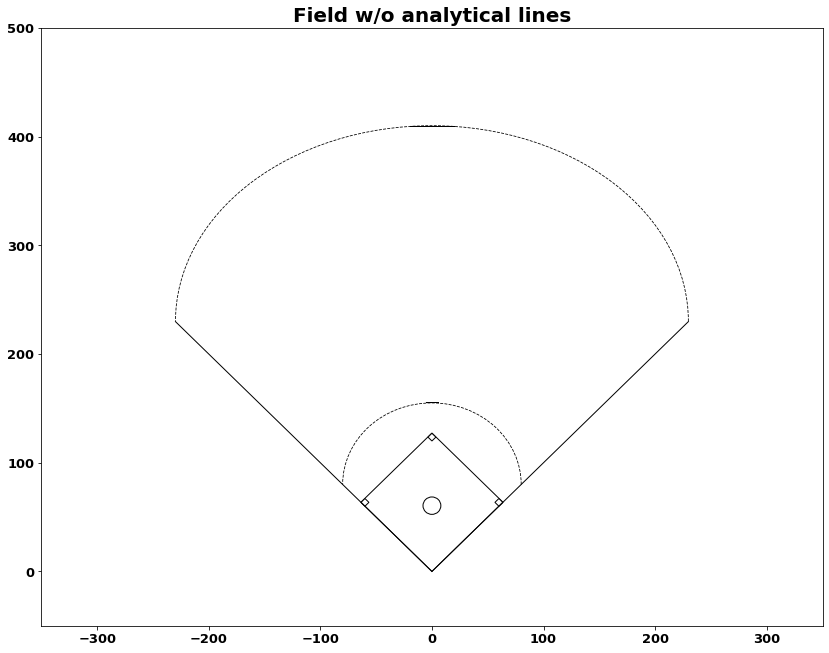

In [74]:
draw_field()
plt.title('Field w/o analytical lines', fontsize=20, fontweight='bold')
plt.show()

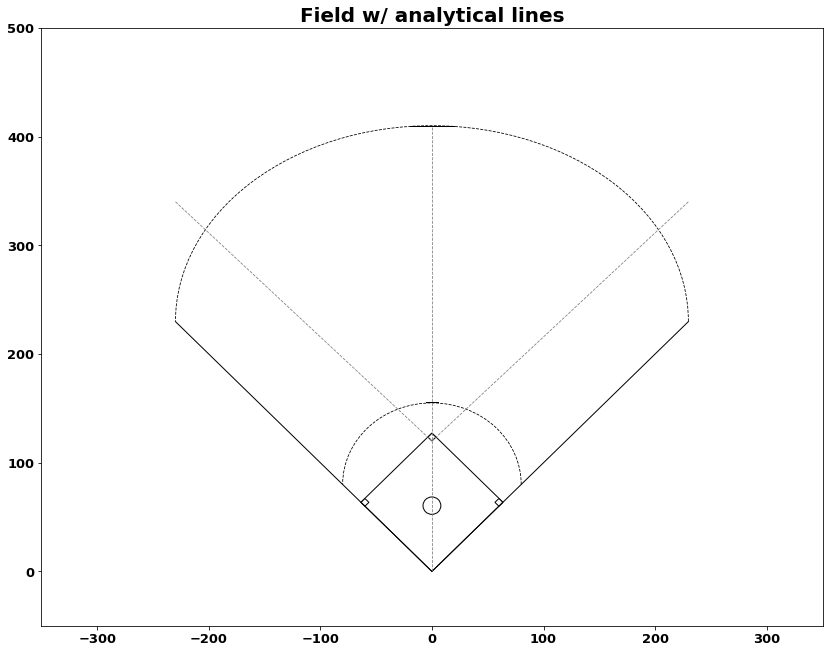

In [75]:
draw_field(alines=True)
plt.title('Field w/ analytical lines', fontsize=20, fontweight='bold')
plt.show()

## Heatmap for all balls put into play

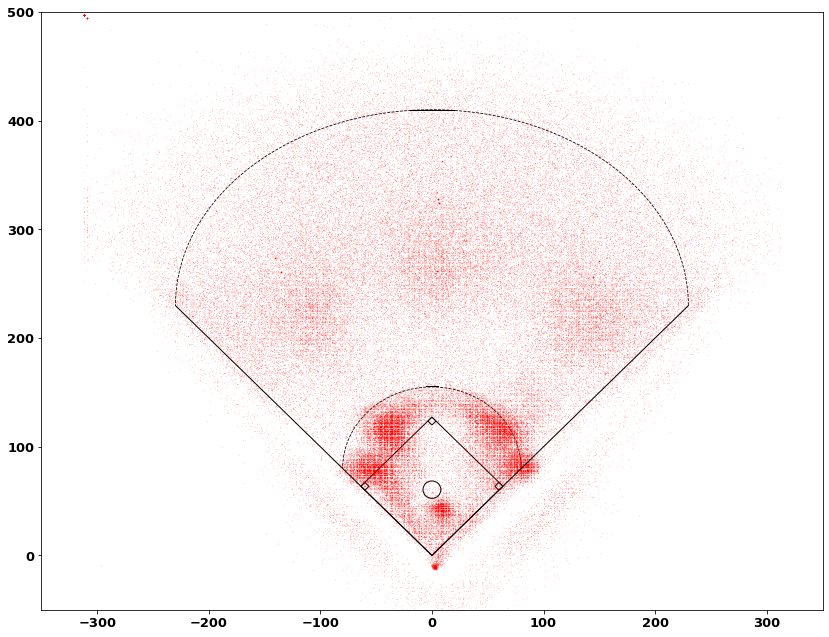

In [8]:
draw_field()
plt.scatter(MLBmap['our.x'],MLBmap['our.y'], s=.01, c='r', marker= '.')
plt.show()

## Function to plot a specified event (ie: single, homer, doubleplay)

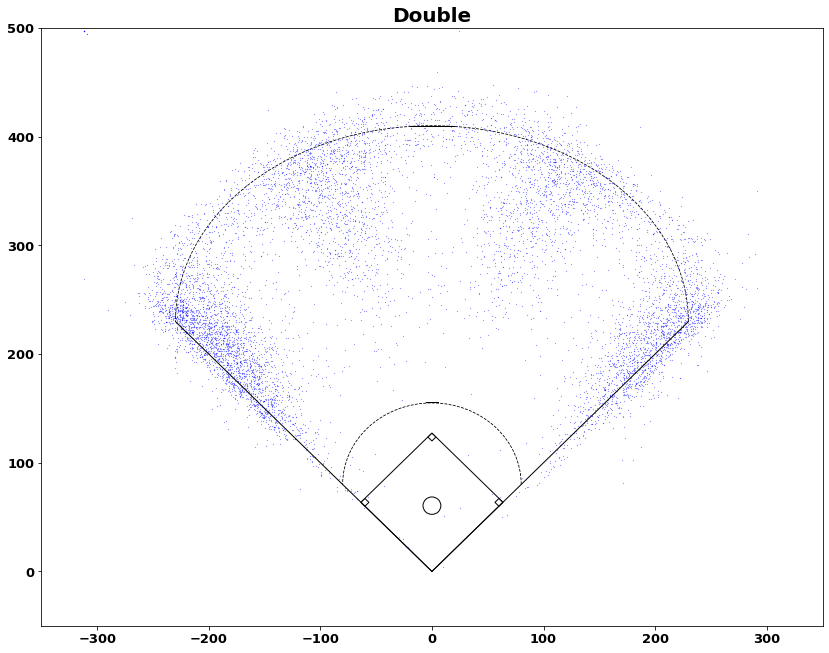

In [9]:
def plot_event(event, color='blue'):
    draw_field()
    
    if type(event) is list:
        for i in event:
            df_event = MLBmap[MLBmap.event == i]
            if df_event.event.count()<10: s=10
            elif df_event.event.count()<100: s=1
            else:s=.1
            plt.scatter(df_event['our.x'],df_event['our.y'], s=s,c=color, marker= '.')
    elif type(event) is str:
        df_event = MLBmap[MLBmap.event == event]
        if df_event.event.count()<10: s=10
        elif df_event.event.count()<100: s=1
        else:s=.1
        plt.scatter(df_event['our.x'],df_event['our.y'], s=s,c=color, marker= '.')
        
    plt.title(event, fontsize=20, fontweight='bold')
    plt.show()
    

plot_event('Double')

## Heatmap for all hits

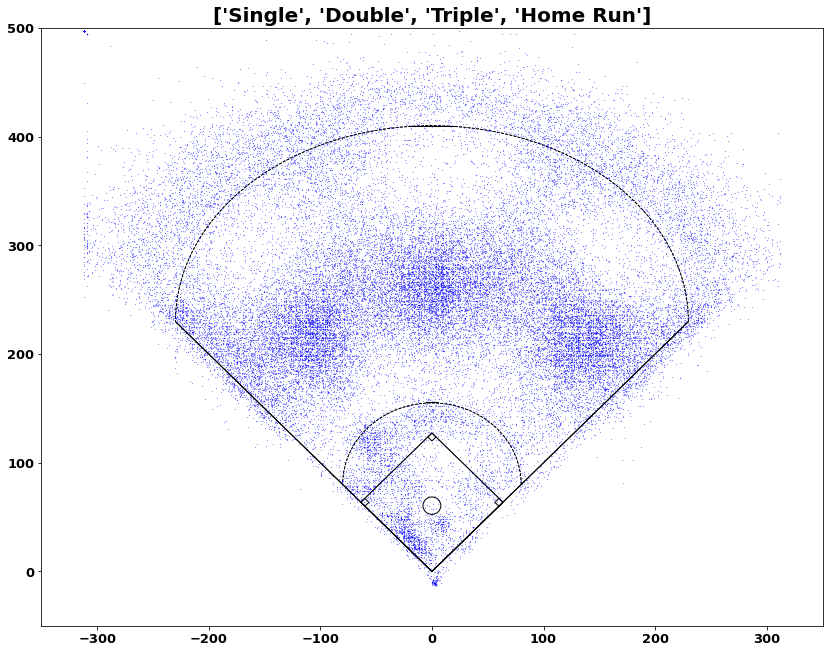

In [10]:
draw_field()

Hits= ['Single', 'Double', 'Triple', 'Home Run']
plot_event(Hits)
plt.show()

## Heatmap for all outs

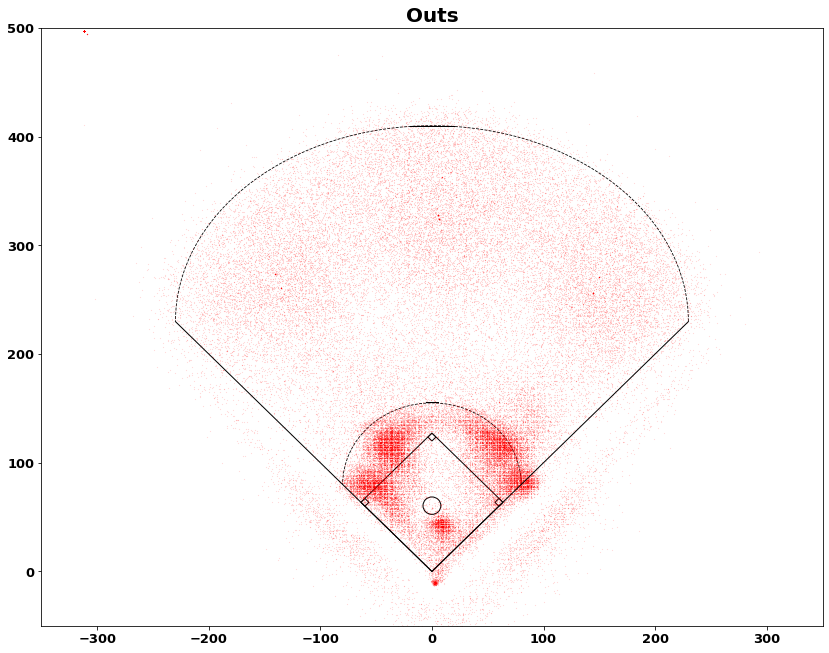

In [11]:
draw_field()
Outs = MLBmap[(MLBmap.event == 'Groundout')|(MLBmap.event == 'Flyout')| (MLBmap.event == 'Pop Out')|
             (MLBmap.event == 'Forceout')|(MLBmap.event == 'Lineout')| (MLBmap.event == 'Grounded Into DP')]
plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
plt.title("Outs", fontsize=20, fontweight='bold')
plt.show()

## Summary list for stadiums

In [12]:
stadiums = MLBmap.groupby('stadium')['gameId'].count().reset_index()
#stadiums

## Progressive Field vs Fenway Park Heatmap

Text(0.5, 1.0, 'Progressive vs Fenway')

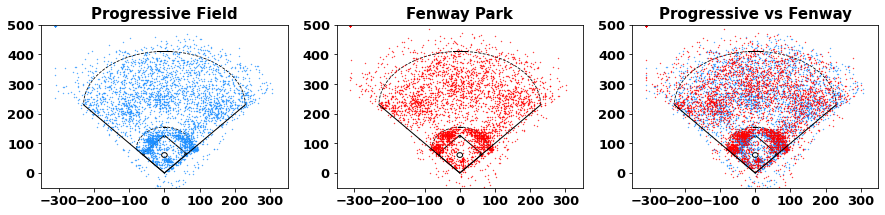

In [13]:
Fen = MLBmap[MLBmap.stadium == 'Fenway Park']
Prog = MLBmap[MLBmap.stadium == 'Progressive Field']

fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(131)
draw_field()
ax=plt.scatter(Prog['our.x'],Prog['our.y'], s=.5,c='dodgerblue', marker= '.')
plt.title("Progressive Field", fontsize=15, fontweight='bold')

ax2 = fig.add_subplot(132)
draw_field()
ax2=plt.scatter(Fen['our.x'],Fen['our.y'], s=.5,c='red', marker= '.')
plt.title("Fenway Park", fontsize=15, fontweight='bold')

ax3 = fig.add_subplot(133)
draw_field()
ax3 = plt.scatter(Prog['our.x'],Prog['our.y'], s=.5,c='dodgerblue', marker= '.')
ax3 = plt.scatter(Fen['our.x'],Fen['our.y'], s=.5,c='red', marker= '.')
plt.title("Progressive vs Fenway", fontsize=15, fontweight='bold')

## Comparing Players


In [14]:
playersn = MLBmap.groupby('batterId')['batterName'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,batterId,count,unique,top,freq
696,607208,748,1,Turner,748
596,596019,747,1,Lindor,747
276,519317,714,1,Stanton,714
101,455976,710,1,Markakis,710
540,593160,709,1,Merrifield,709
...,...,...,...,...,...
434,571882,1,1,Law,1
435,571893,1,1,Liberatore,1
463,572403,1,1,VerHagen,1
470,572955,1,1,"Johnson, P",1


## Compare a right handed hitter with a left handed hitter

Text(0.5, 1.0, 'Markakis vs Turner')

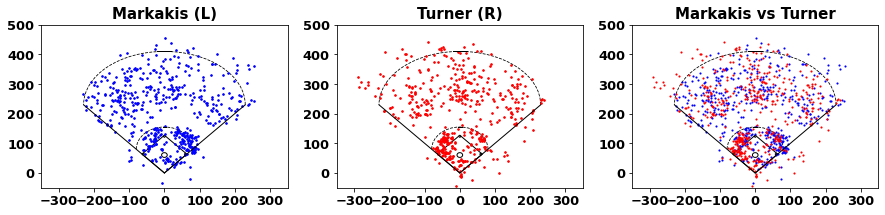

In [19]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(131)

# Left Handed - Markakis b607208 = MLBmap[MLBmap.batterId == 607208]
b455976 = MLBmap[MLBmap.batterId == 455976] # Markakis (L)
draw_field()
ax = plt.scatter(b455976['our.x'],b455976['our.y'], s=10,c='blue', marker= '.')
plt.title("Markakis (L)", fontsize=15, fontweight='bold')

# Right Handed - Turner
b607208 = MLBmap[MLBmap.batterId == 607208] # Turner (R)
ax2 = fig.add_subplot(132)
draw_field()
ax2 = plt.scatter(b607208['our.x'],b607208['our.y'], s=10,c='red', marker= '.')
plt.title("Turner (R)", fontsize=15, fontweight='bold')

# Markakis (L) vs Turner (R)
ax3 = fig.add_subplot(133)
draw_field()
ax3 = plt.scatter(b455976['our.x'],b455976['our.y'], s=5,c='blue', marker= '.')
ax3 = plt.scatter(b607208['our.x'],b607208['our.y'], s=5,c='red', marker= '.')
plt.title("Markakis vs Turner", fontsize=15, fontweight='bold')

## Heatmap for all lefties vs all righties

Text(0.5, 1.0, 'Left vs Right')

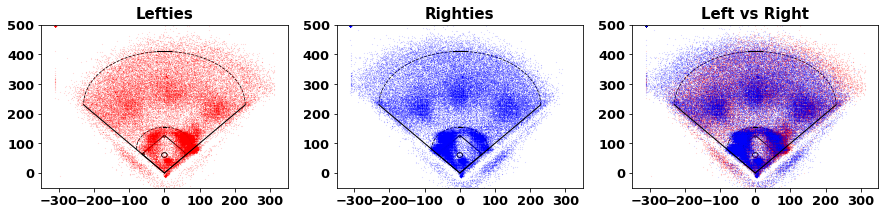

In [20]:
Left = MLBmap[MLBmap.stand == 'L']
Right = MLBmap[MLBmap.stand == 'R']

f = plt.figure(figsize=(15,3))
ax = f.add_subplot(131)
draw_field()
ax=plt.scatter(Left['our.x'],Left['our.y'], s=.01,c='r', marker= '.')
plt.title("Lefties", fontsize=15, fontweight='bold')

ax2 = f.add_subplot(132)
draw_field()
ax2=plt.scatter(Right['our.x'],Right['our.y'], s=.01,c='b', marker= '.')
plt.title("Righties", fontsize=15, fontweight='bold')

ax3 = f.add_subplot(133)
draw_field()
ax3 = plt.scatter(Left['our.x'],Left['our.y'], s=.01,c='r', marker= '.')
ax3 = plt.scatter(Right['our.x'],Right['our.y'], s=.01,c='b', marker= '.')
plt.title("Left vs Right", fontsize=15, fontweight='bold')